In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('C:\\Users\Lisha\Downloads\project\PS_20174392719_1491204439457_log.csv')
print(df.shape)
df.head()

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
#checking for null values 
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
#type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#count of different type of transactions 
type_of_transactions = df.type.value_counts()
type_of_transactions

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

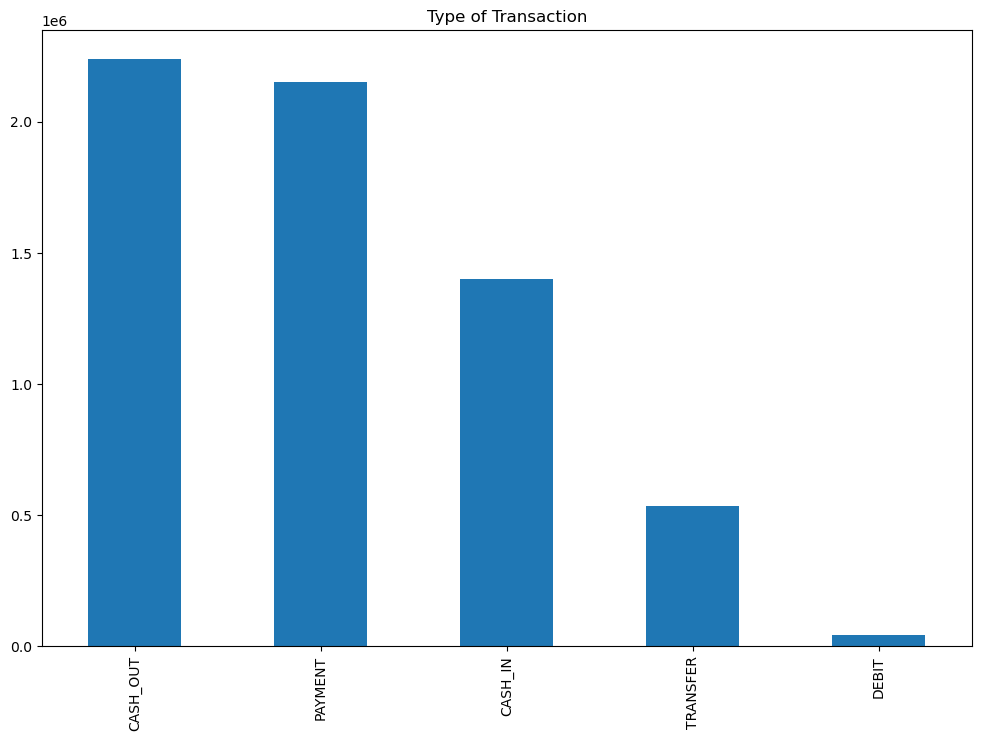

In [6]:
#plotting the type of transactions
plt.subplots(1,1, figsize=(8,8))
# plotting the number of different types of values present in type column
df.type.value_counts().plot(kind='bar', 
        title="Type of Transaction", figsize=(12,8))
plt.show()

In [7]:
#Converting the categorical data into numerical data to processed very easily.
df.type = df.type.map({"CASH_OUT": 1, "PAYMENT": 2, 'CASH_IN': 3, 'TRANSFER': 4, 'DEBIT': 5})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
# Number of Fraud Transactions
print(len(df[df['isFraud']==1]))

# Number of transactions flagged as Fraud 
print(len(df[df['isFlaggedFraud']==1]))

#fraud occurences in type of transaction
print(df[df['isFraud']==1].type.value_counts())

8213
16
1    4116
4    4097
Name: type, dtype: int64


In [9]:
df[df['isFlaggedFraud']==1]['amount'].value_counts()

10000000.00    3
4953893.08     1
1343002.08     1
536624.41      1
4892193.09     1
9585040.37     1
3576297.10     1
353874.22      1
2542664.27     1
399045.08      1
3441041.46     1
3171085.59     1
7316255.05     1
5674547.89     1
Name: amount, dtype: int64

In [10]:
df[df['isFlaggedFraud']==1].type.value_counts()

#The type of transaction is transfer whenever the flag is true. 
# As we saw earlier thier are two types of transations which are marked as fraud - Cashout and transfer

4    16
Name: type, dtype: int64

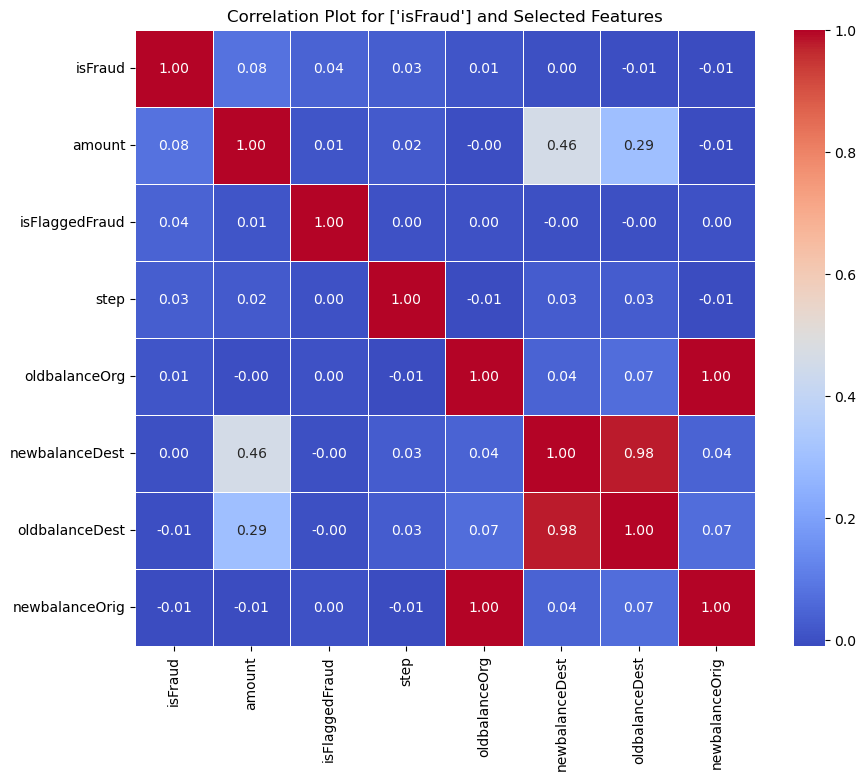

In [11]:

# Adjust columns accordingly based on your actual dataset
columns = ['isFraud', 'amount', 'isFlaggedFraud', 'step', 'oldbalanceOrg', 'newbalanceDest', 'oldbalanceDest', 'newbalanceOrig']
target = ['isFraud']

# Select the specified columns
selected_columns = columns

# Calculate correlation matrix
correlation = df[selected_columns].corr()

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Plot for {target} and Selected Features')
plt.show()

In [12]:
#Segregate those columns which are required to train the model
X = np.array(df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']])
y = np.array(df[['isFraud']])

print(X.shape)
print(y.shape)

(6362620, 4)
(6362620, 1)


In [13]:
# Select the specified columns
df_ml = df[columns]

# Separate features and target variable
X = df_ml.drop('isFraud', axis=1)
y = df_ml['isFraud']

In [14]:
# Handling Imbalanced Data
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)


In [15]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [16]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Model Training
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier()
}



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94   1270837
           1       0.97      0.90      0.93   1270926

    accuracy                           0.94   2541763
   macro avg       0.94      0.94      0.94   2541763
weighted avg       0.94      0.94      0.94   2541763

Cross-Validation Scores: [0.9371465  0.93681845 0.93708795 0.93675255 0.93726351]


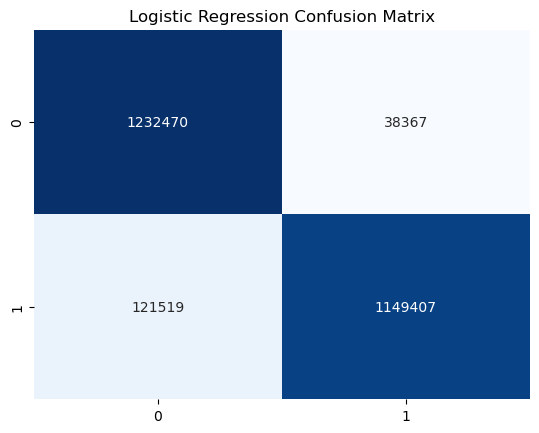

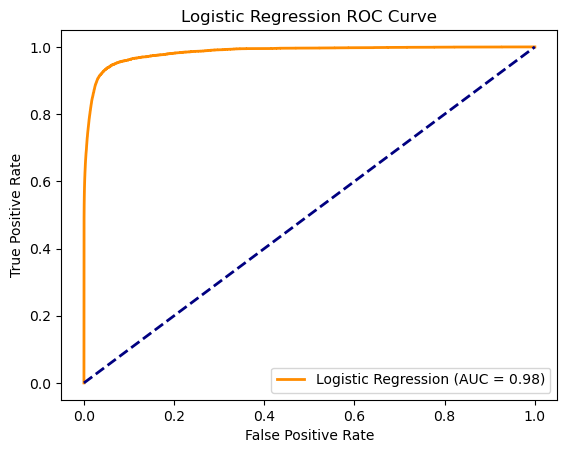


Decision Tree Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763

Cross-Validation Scores: [0.99988    0.99987853 0.99989574 0.99988541 0.99988148]


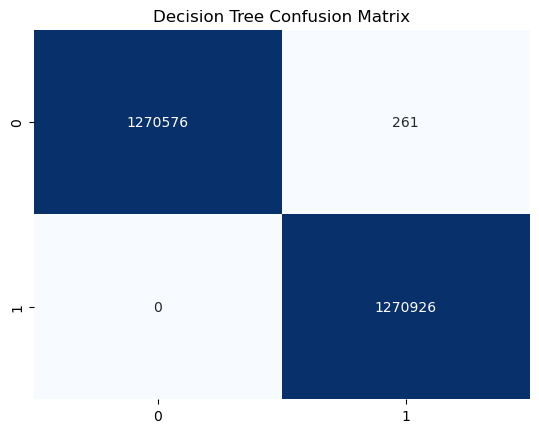

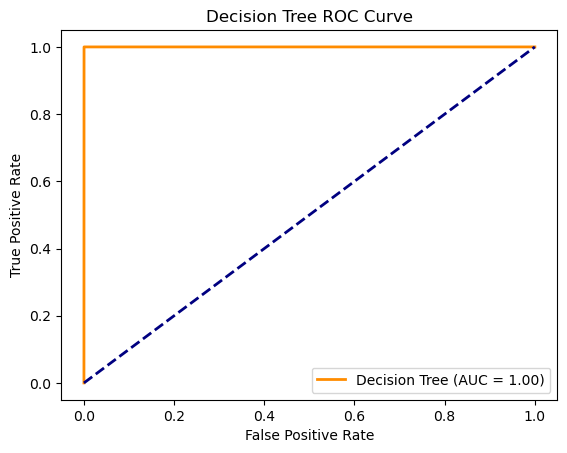

In [18]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Evaluation Metrics
    print(f'\n{name} Results:')
    print(classification_report(y_test, y_pred))
    
    #cross validation
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
    print("Cross-Validation Scores:", scores)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # ROC Curve
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()


In [19]:
feature_importances = models['Decision Tree'].feature_importances_

print("Feature Importances:")
for feature, importance in zip(X_train_scaled, feature_importances):
    print(f"{feature}: {importance:.4f}")



Feature Importances:
[-0.43935165 -0.03094248 -1.3278825  -0.34469949 -0.33005245 -0.24328184
 -0.16036217]: 0.1711
[-0.31369852 -0.03094248 -1.47778073 -0.37831831 -0.20135745 -0.16915833
 -0.20837705]: 0.0007
[-4.04260198e-01 -3.09424793e-02 -8.57512186e-01 -2.61266555e-01
 -1.32038044e-01 -7.84683560e-04 -2.60595151e-02]: 0.0382
[-0.2685458  -0.03094248 -0.82649876 -0.28189951 -0.2147203  -0.20905446
 -0.20837705]: 0.3740
[ 2.18247273 -0.03094248  0.53809203  1.12143662  0.95959281 -0.24328184
 -0.20837705]: 0.0042
[ 0.35496244 -0.03094248 -1.03325494  0.07509153 -0.33005245 -0.24328184
 -0.20837705]: 0.0017
[ 0.14042383 -0.03094248  1.7682913  -0.04774304 -0.33005245 -0.24328184
 -0.20837705]: 0.4101


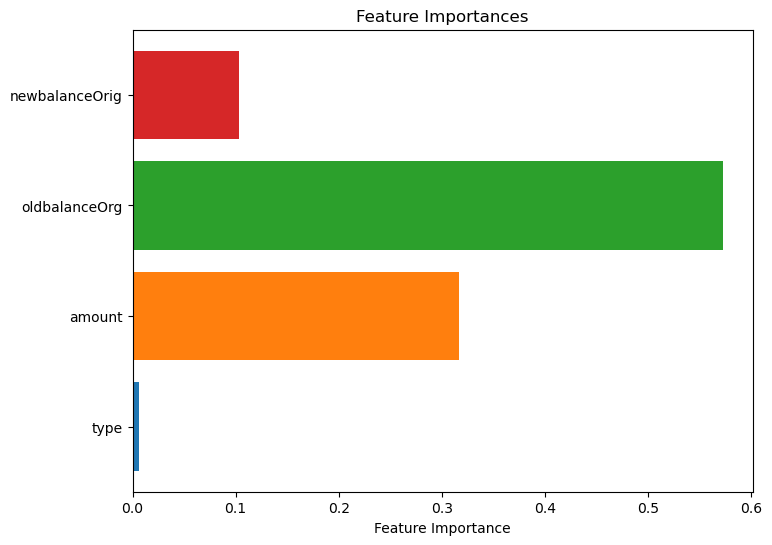

In [20]:
importance_data = [
    ('type', [1.0000000e+00, 1.3225409e+05, 5.9853100e+05, 4.6627691e+05], 0.0065),
    ('amount', [3.00000000e+00, 7.11910500e+04, 1.53758019e+07, 1.54469929e+07], 0.3171),
    ('oldbalanceOrg', [4.000000e+00, 8.717512e+05, 4.774300e+04, 0.000000e+00], 0.5728),
    ('newbalanceOrig', [3.0000000e+00, 2.1155734e+05, 3.0245222e+05, 5.1400955e+05], 0.1037)
]

plt.figure(figsize=(8, 6))
for feature_name, feature_data, importance in importance_data:
    plt.barh(feature_name, importance)

plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



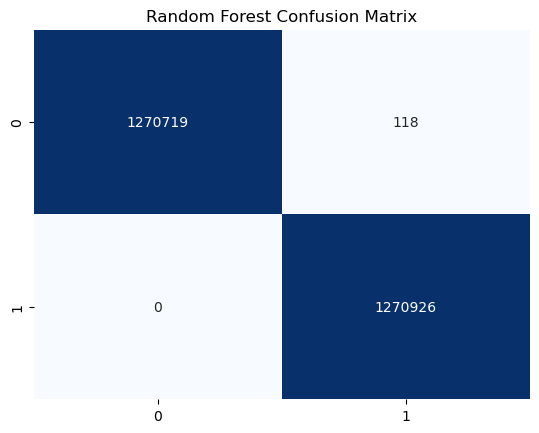

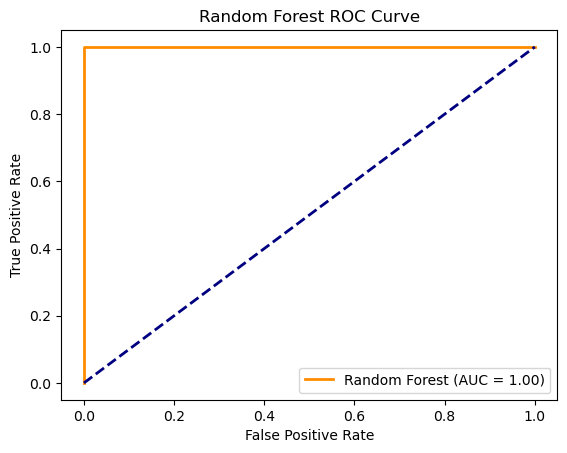

In [21]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42 ,n_jobs=-1)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Evaluation Metrics
    print(f'\n{name} Results:')
    print(classification_report(y_test, y_pred))
    

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # ROC Curve
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()



In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.01]
}


# Create the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print(f'Best Parameters: {best_params}')